<br><br><br><br><br>

# uproot: array-based ROOT I/O

<br><br><br><br><br>

In [3]:
# Uproot presents files and subdirectories with the same interface as Python dicts.

import uproot
file = uproot.open("http://scikit-hep.org/uproot/examples/nesteddirs.root")
file.keys()

# Exercise: how many objects named "tree" does this file contain?
# 
# (https://uproot.readthedocs.io/en/latest/root-io.html#uproot-rootio-rootdirectory)

[b'one;1', b'three;1']

In [4]:
# TTrees are also presented like Python dicts.

events = uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"]
events.keys()

[b'Type',
 b'Run',
 b'Event',
 b'E1',
 b'px1',
 b'py1',
 b'pz1',
 b'pt1',
 b'eta1',
 b'phi1',
 b'Q1',
 b'E2',
 b'px2',
 b'py2',
 b'pz2',
 b'pt2',
 b'eta2',
 b'phi2',
 b'Q2',
 b'M']

In [142]:
# And there are functions with names like array (singular) and arrays (plural) to get one or more arrays.

print(events.array("E1"), end="\n\n")

print(events.arrays(["E1", "px1", "py1", "pz1"]))

[82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735]), b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
        32.37749196,  32.48539387]), b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
         1.19940578,   1.2013503 ]), b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
       -74.53243061, -74.80837247])}


In [143]:
# Some tricks for arrays (plural): (1) specify an encoding to get strings, rather than raw bytes, as dict keys:

events.arrays(["E1", "px1", "py1", "pz1"], namedecode="utf-8")

{'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [144]:
# Some tricks for arrays (plural): (2) specify an output type to wrap them in a different container:

events.arrays(["E1", "px1", "py1", "pz1"], outputtype=tuple)

(array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]))

In [145]:
# Some tricks for arrays (plural): (2) specify an output type to wrap them in a different container:

import pandas
events.arrays(["E1", "px1", "py1", "pz1"], outputtype=pandas.DataFrame)

,E1,px1,py1,pz1
entry,,,,
0,82.201866,-41.195288,17.433244,-68.964962
1,62.344929,35.118050,-16.570362,-48.775247
2,62.344929,35.118050,-16.570362,-48.775247
3,60.621875,34.144437,-16.119525,-47.426984
4,41.826389,22.783582,15.036444,-31.689894
5,48.981407,-19.862307,-9.204225,43.817098
6,48.981407,-19.862307,-9.204225,43.817098
7,49.760726,-20.177373,-9.354149,44.513955
8,132.780755,71.143711,29.542308,-108.150553


In [150]:
# Some tricks for arrays (plural): (3a) use filename wildcards (*, ?, [...]) to select by name-pattern.

events.arrays(["E*", "p[xyz]1"])

{b'Event': array([10507008, 10507008, 10507008, ..., 99991333, 99991333, 99991333],
       dtype=int32),
 b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'E2': array([ 60.62187459,  82.20186639,  81.58277833, ..., 168.78012134,
        170.58313243, 170.58313243]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [152]:
# Some tricks for arrays (plural): (3b) use slashes inside the quotes to use full regular expressions.

events.arrays(["/E.*/", "/p[x-z]1/"])

{b'Event': array([10507008, 10507008, 10507008, ..., 99991333, 99991333, 99991333],
       dtype=int32),
 b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'E2': array([ 60.62187459,  82.20186639,  81.58277833, ..., 168.78012134,
        170.58313243, 170.58313243]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

<p style="font-size: 2em">Three basic ways to get data:</p>

<table width="100%" style="font-size: 1.25em"><tr>
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Read the file and return an array.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id11">TBranch.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#array">TTree.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#arrays">TTree.arrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Get an object that reads on demand.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id13">TBranch.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarray">TTree.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarrays">TTree.lazyarrays</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Read arrays in batches of entries.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#iterate">TTree.iterate</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-iterate">uproot.iterate</a></li>
        </ul>
    </td>
</tr></table>

In [5]:
# Direct:

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [140]:
# Lazy:

array = events.lazyarray("E1", entrysteps=500)
# print([len(x) for x in array.chunks])

array

<ChunkedArray [82.2018663875 62.3449289481 62.3449289481 ... 81.2701355756 81.2701355756 81.5662173543] at 0x7f39c0214208>

In [10]:
# Iterative:

for chunk in events.iterate("E1", entrysteps=500):
    print(len(chunk[b"E1"]), chunk[b"E1"][:5])

500 [82.20186639 62.34492895 62.34492895 60.62187459 41.82638891]
500 [45.7959062  45.7108209  98.03548137 53.53706097 53.53706097]
500 [31.4488924  31.4488924  31.39073377 64.85457285 46.92904281]
500 [88.35872379 52.5560163  52.5560163  52.38402383 75.34015706]
304 [46.0752809  46.0752809  45.93225789 51.01950403 84.91115834]


<p style="font-size: 2em">Advantages and disadvantages of each:</p>

<table width="100%" style="font-size: 1.25em"><tr>
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Simple; most libraries will recognize the Numpy array you get back.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Transparently work on data too large to fit into memory.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Control the loading of data into and out of memory.</p>
    </td>
</tr></table>

In [20]:
# Exercise: compute numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2) in all three modes.
# 
# (https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

import numpy

arrays = events.arrays(["E1", "p[xyz]1"], namedecode="utf-8")
E1, px1, py1, pz1 = arrays["E1"], arrays["px1"], arrays["py1"], arrays["pz1"]

result = numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2)
result

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

In [157]:
print("Lazy or iteration steps as a fixed number of entries:")
for arrays in events.iterate(entrysteps=500):
    print(len(arrays[b"E1"]))

print("\nLazy or iteration steps as a fixed memory footprint:")
for arrays in events.iterate(entrysteps="100 kB"):
    print(len(arrays[b"E1"]))

Lazy or iteration steps as a fixed number of entries:
500
500
500
500
304

Lazy or iteration steps as a fixed memory footprint:
717
717
717
153


<br><br><br><br><br>

## Application: feeding data into PyTorch

<br><br><br><br><br>

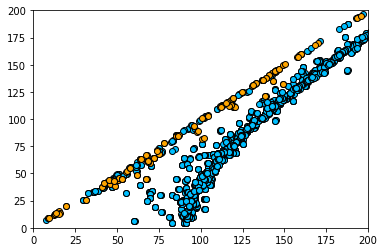

In [77]:
# Let's train a neural network! First, though, we need to set up a problem.

# 2-dimensional for simplicity (easier to visualize and we don't have much data).
E1, E2, px1, py1, pz1, px2, py2, pz2, Q1, Q2 = events.arrays(["E[12]", "p[xyz][12]", "Q[12]"], outputtype=tuple)
E = (E1 + E2)
p = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2 + (pz1 + pz2)**2)

# Need to predict opposite sign (deepskyblue) vs same sign (orange) using E and p.
%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 200);
matplotlib.pyplot.ylim(0, 200);

In [122]:
import torch                             # transform inputs to fit PyTorch's expected shape and type
X = torch.from_numpy(numpy.dstack([E, p])[0].astype(numpy.float32))
y = torch.from_numpy((Q1 != Q2).astype(numpy.float32).reshape(-1, 1))

neural_network = torch.nn.Sequential(    # the neural network topology:
    torch.nn.Linear(2, 5),               # input → hidden: 2 dimensions → 5 dimensions
    torch.nn.Sigmoid(),                  # non-linearity applied to each of the 5 components
    torch.nn.Linear(5, 1))               # hidden → output: 5 dimensions → 1 dimension

loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.001)

for i in range(1000):                    # iterate 1000 times to minimize loss: y_pred - y
    y_pred = neural_network(X)           # neural_network is a function: X ↦ y
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

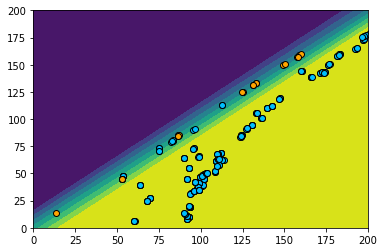

In [123]:
grid_of_points = numpy.dstack(numpy.mgrid[0:220:20, 0:220:20].astype(numpy.float32))
Z = neural_network(torch.from_numpy(grid_of_points)).detach().numpy().reshape(grid_of_points.shape[:2])
matplotlib.pyplot.contourf(grid_of_points[:, :, 0], grid_of_points[:, :, 1], Z);
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 200);
matplotlib.pyplot.ylim(0, 200);

In [118]:
# Now let's pretend the sample is so large, we can't load it into memory.
# What has changed? What's the same?

optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.0001)  # learn slower: fewer data points...

for E1, E2, px1, py1, pz1, px2, py2, pz2, Q1, Q2 in \
        events.iterate(["E[12]", "p[xyz][12]", "Q[12]"], outputtype=tuple, entrysteps=500):
    E = (E1 + E2)
    p = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2 + (pz1 + pz2)**2)
    
    X = torch.from_numpy(numpy.dstack([E, p])[0].astype(numpy.float32))
    y = torch.from_numpy((Q1 != Q2).astype(numpy.float32).reshape(-1, 1))

    for i in range(1000):
        y_pred = neural_network(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [126]:
# Now do it from a sample of jagged arrays (variable number of values per event).

events2 = uproot.open("http://scikit-hep.org/uproot/examples/HZZ.root")["events"]
E_all, px_all, py_all, pz_all, q_all = events2.arrays(["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

E_all, px_all, py_all, pz_all, q_all

(<JaggedArray [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x7f39a04a5748>,
 <JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7f39a04a5f28>,
 <JaggedArray [[-11.654672 0.6934736] [-24.404259] [-21.723139 29.800508] ... [-15.303859] [63.60957] [-35.665077]] at 0x7f39a0486550>,
 <JaggedArray [[-8.160793 -11.307582] [20.199968] [11.168285 36.96519] ... [-52.66375] [162.17632] [54.719437]] at 0x7f39a04865f8>,
 <JaggedArray [[1 -1] [1] [1 -1] ... [-1] [-1] [-1]] at 0x7f39a0486eb8>)

In [125]:
# Getting two muons from events that have them:

print(E_all.counts)

E_all[E_all.counts >= 2, 0], E_all[E_all.counts >= 2, 1]

[2 1 2 ... 1 1 1]


(array([ 54.7795  ,  54.739788, 413.46002 , ...,  60.03222 ,  66.367775,
        157.22563 ], dtype=float32),
 array([ 39.401695,  47.488857, 344.04153 , ...,  40.399345,  28.650345,
        116.12509 ], dtype=float32))

In [134]:
# Or all pairs, without double-counting:

left, right = E_all.argchoose(2).i0, E_all.argchoose(2).i1

E_all[left].flatten(), E_all[right].flatten()

(array([ 54.7795  ,  54.739788, 413.46002 , ...,  60.03222 ,  66.367775,
        157.22563 ], dtype=float32),
 array([ 39.401695,  47.488857, 344.04153 , ...,  40.399345,  28.650345,
        116.12509 ], dtype=float32))

In [138]:
# Exercise: set up and run the neural network with muons from the jagged sample.

X = FIXME
y = FIXME

neural_network = torch.nn.Sequential(torch.nn.Linear(2, 5), torch.nn.Sigmoid(), torch.nn.Linear(5, 1))
loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.001)
for i in range(1000):
    y_pred = neural_network(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [139]:
grid_of_points = numpy.dstack(numpy.mgrid[0:520:20, 0:520:20].astype(numpy.float32))
Z = neural_network(torch.from_numpy(grid_of_points)).detach().numpy().reshape(grid_of_points.shape[:2])
matplotlib.pyplot.contourf(grid_of_points[:, :, 0], grid_of_points[:, :, 1], Z);
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 500);
matplotlib.pyplot.ylim(0, 500);

<br><br><br><br><br>

## Caching

<br><br><br><br><br>

In [158]:
# Direct array-reading is simple: every time you ask for an array, it reads from the file (raw bytes may be cached).
# 
# You could avoid duplicate reading/decompressing/formatting by keeping a reference to previously read arrays.

# read
arrays = events.arrays(["E1", "p[xyz]1"], namedecode="utf-8")

# use
numpy.sqrt(arrays["px1"]**2 + arrays["py1"]**2)

# use again
numpy.sqrt(arrays["E1"]**2 - arrays["px1"]**2 - arrays["py1"]**2 - arrays["pz1"]**2)

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

In [159]:
# But that would force you to re-arrange your analysis script to satisfy hardware constraints.
# 
# Instead, use uproot's caching mechanism: any dict-like object can be used as a cache.

mycache = {}

# read and use
E1, px1, py1, pz1 = events.arrays(["E1", "p[xyz]1"], outputtype=tuple, cache=mycache)
numpy.sqrt(px1**2 + py1**2)

# get from cache and use again
E1, px1, py1, pz1 = events.arrays(["E1", "p[xyz]1"], outputtype=tuple, cache=mycache)
numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2)

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

In [160]:
# The data are now in the mycache dict, which you can clear whenever you need to.

# mycache.clear()
mycache

{'AAGUS3fQmKsR56dpAQAAf77v;events;E1;asdtype(Bf8(),Lf8());0-2304': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'AAGUS3fQmKsR56dpAQAAf77v;events;px1;asdtype(Bf8(),Lf8());0-2304': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'AAGUS3fQmKsR56dpAQAAf77v;events;py1;asdtype(Bf8(),Lf8());0-2304': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'AAGUS3fQmKsR56dpAQAAf77v;events;pz1;asdtype(Bf8(),Lf8());0-2304': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

<br><br>

<p style="font-size: 1.25em">The point is that naive, exploratory code becomes production-ready code in small steps.</p>

   1. Read from the file in early exploration because it requires the least effort.
   2. Insert `mycache = {}` and `cache=mycache` to avoid costly re-reading when you start looking at more data.
   3. Use an `uproot.ArrayCache` to specify an upper limit when you start running out of memory.
   4. Maybe use an external cache like [memcached](https://realpython.com/python-memcache-efficient-caching/) to quickly recover from crashing 90% through your script, to more easily debug that last 10%.
   5. Maybe use a [diskcache](http://www.grantjenks.com/docs/diskcache/tutorial.html) to split data between a small, fast disk and a large, slow disk...

Most cache libraries in the Python ecosystem use dict of string → objects as an interface.

<br><br>

In [165]:
# Example of limited memory:

mycache = uproot.ArrayCache("100 kB")

events.arrays(cache=mycache)

len(mycache)

6

In [205]:
# With large lazy arrays, you SHOULD use a cache with an upper limit. (Otherwise, they'll hang onto data forever.)

data = uproot.lazyarray(
    # a bunch or files
    "data/sample-*-zlib.root",
    # TTree name in each file
    "sample",
    # branch(s) in each file for lazyarray(s)
    "Af8",
    # use this cache with an upper limit instead of reading exactly once
    cache=uproot.ArrayCache("5 kB"))

data

<ChunkedArray [[] [-15.0] [-15.0 -13.9] ... [10.0 11.1] [10.0 11.1 12.2] [10.0 11.1 12.2 13.3]] at 0x7f385e36d5f8>

In [206]:
# Compute something to do a pass over all chunks...
# data + 100

[chunk.ismaterialized for chunk in data.chunks]

[True, False, False, False, False, False, False, False, False, False, True]